In [1]:
import sys
import os

project_root = r"C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms"
sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.models.predictor import StudentRiskPredictor
from src.models.model_analyzer import ModelAnalyzer
from src.utils.config import *

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Setup complete")

✓ Setup complete


# 03 - Model Training and Evaluation

Train multiple ML models and select the best performer.

## Objectives:
1. Load engineered features
2. Train multiple ML models
3. Compare model performance
4. Save the best model

In [2]:
# Load features
features_path = os.path.join(PROCESSED_DATA_DIR, 'student_features_1000.csv')

print(f"Loading features from: {features_path}")
features = pd.read_csv(features_path)

print(f"\n✓ Features loaded successfully")
print(f"Total students: {len(features)}")
print(f"Total features: {len(features.columns) - 2}")
print(f"At-risk students: {features['at_risk'].sum()} ({features['at_risk'].mean()*100:.1f}%)")

Loading features from: C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms\data\processed\student_features_1000.csv

✓ Features loaded successfully
Total students: 1000
Total features: 17
At-risk students: 237 (23.7%)


## Step 1: Prepare Data for Training

In [3]:
# Initialize predictor
predictor = StudentRiskPredictor(random_state=42)

# Prepare data (scaling, splitting)
print("Preparing data for model training...")
X, y = predictor.prepare_data(features)

print(f"\n✓ Data preparation complete")
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

Preparing data for model training...
Preparing data for training...
Data prepared: 1000 samples, 17 features
Class distribution: At-risk=237 (23.7%), Normal=763 (76.3%)

✓ Data preparation complete
Feature matrix shape: (1000, 17)
Target variable shape: (1000,)


## Step 2: Train Multiple Models

In [4]:
# Train and compare multiple models
print("Training multiple machine learning models...")
print("This may take a minute...\n")

results = predictor.train_models(X, y, test_size=0.2, cv_folds=5)

print(f"\n✓ Model training complete!")
print(f"Best model: {predictor.best_model_name}")

Training multiple machine learning models...
This may take a minute...


Training models with 5-fold cross-validation...
Training set: 800 samples
Test set: 200 samples

Training logistic...
  CV AUC: 1.0000 (+/- 0.0000)
  Test AUC: 1.0000

Training random_forest...
  CV AUC: 1.0000 (+/- 0.0000)
  Test AUC: 1.0000

Training gradient_boost...
  CV AUC: 1.0000 (+/- 0.0000)
  Test AUC: 1.0000

✓ Best model: logistic (Test AUC: 1.0000)

✓ Model training complete!
Best model: logistic


## Step 3: Model Performance Analysis

In [5]:
# Initialize analyzer
analyzer = ModelAnalyzer()

# Create summary report
analyzer.create_summary_report(results, predictor.best_model_name)

# Get best model results
best_result = results[predictor.best_model_name]

# Print classification report
analyzer.print_classification_report(best_result['y_test'], best_result['y_pred'])


MODEL TRAINING SUMMARY REPORT

★ LOGISTIC
  Cross-Validation AUC: 1.0000 (±0.0000)
  Test AUC: 1.0000

  RANDOM_FOREST
  Cross-Validation AUC: 1.0000 (±0.0000)
  Test AUC: 1.0000

  GRADIENT_BOOST
  Cross-Validation AUC: 1.0000 (±0.0000)
  Test AUC: 1.0000

✓ BEST MODEL: LOGISTIC
  Test AUC: 1.0000


CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       153
     At-Risk       1.00      1.00      1.00        47

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200




## Step 4: Visualize Model Performance

Model Comparison:


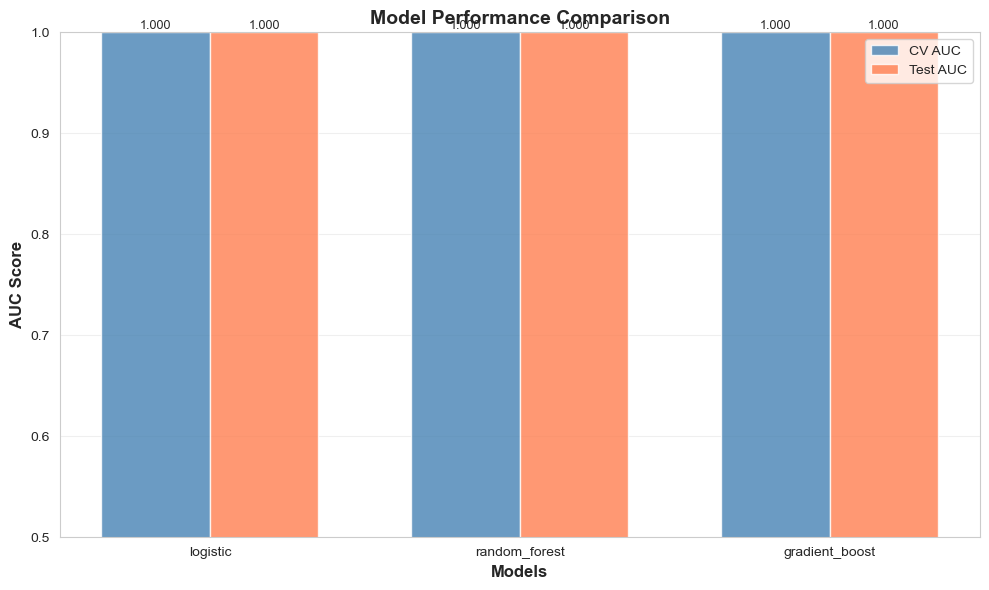

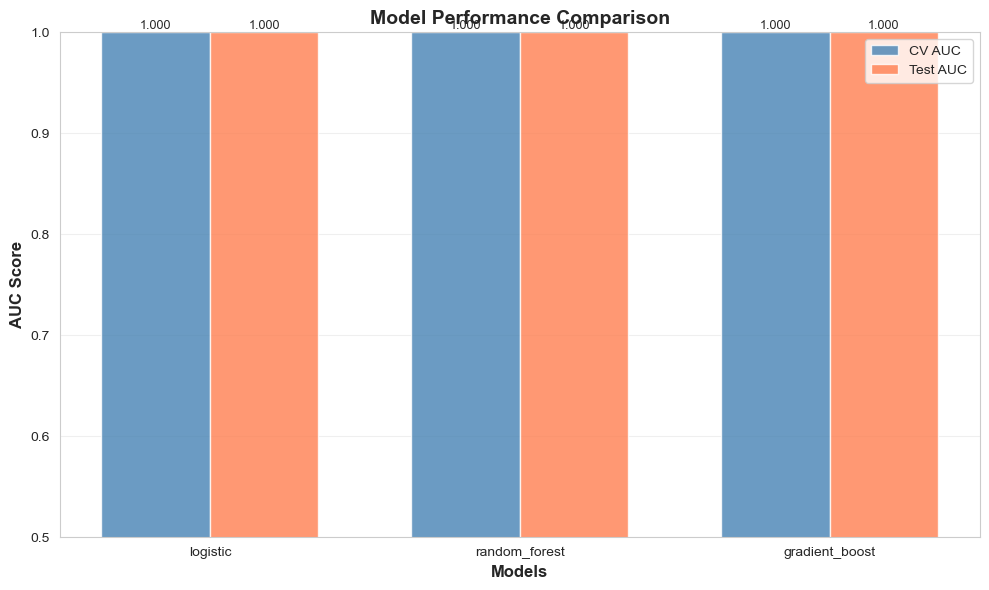

In [6]:
# Compare all models
print("Model Comparison:")
analyzer.plot_model_comparison(results)


ROC Curves:


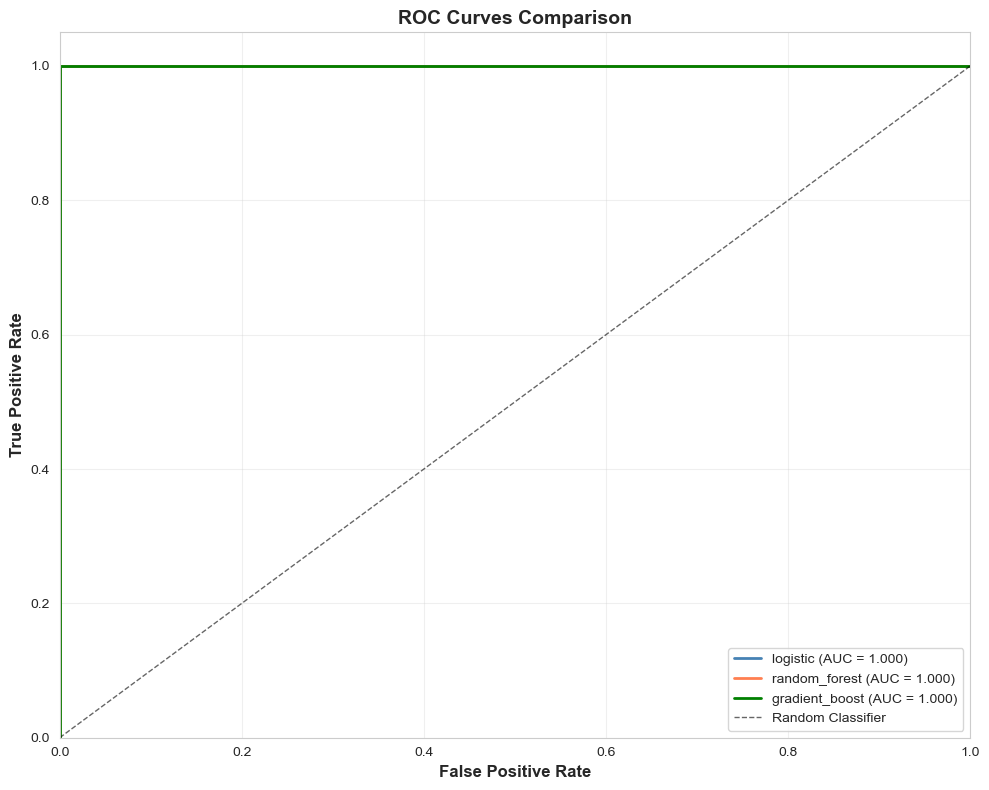

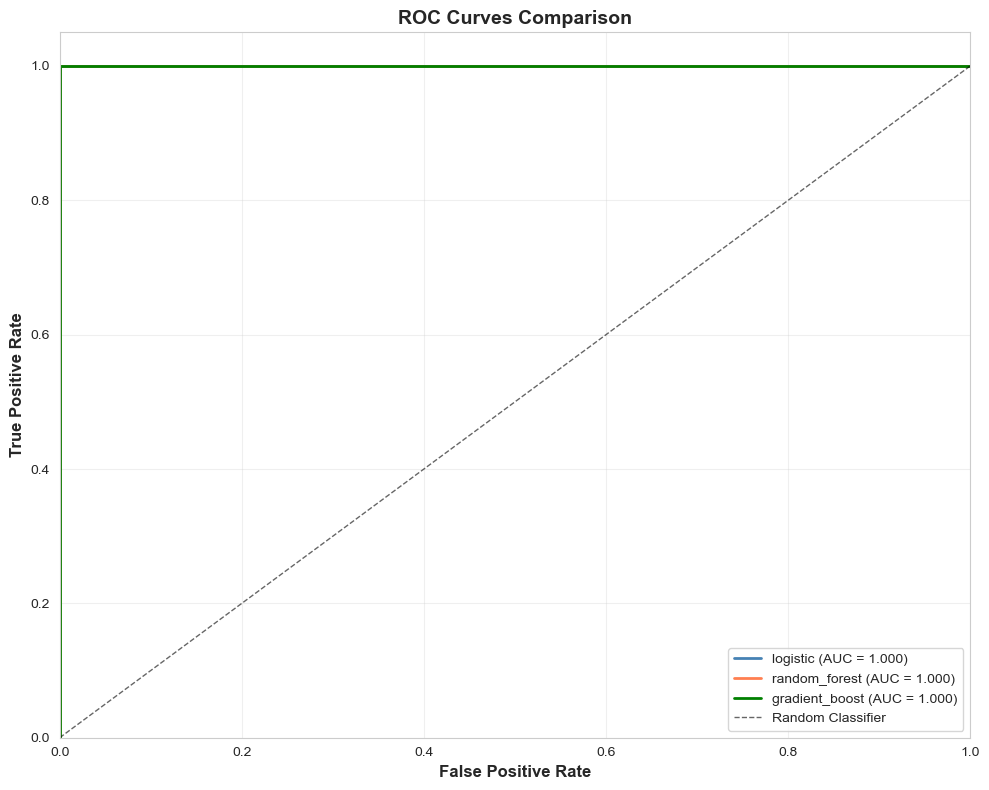

In [7]:
# Plot ROC curves
print("\nROC Curves:")
analyzer.plot_roc_curves(results)


Confusion Matrix:


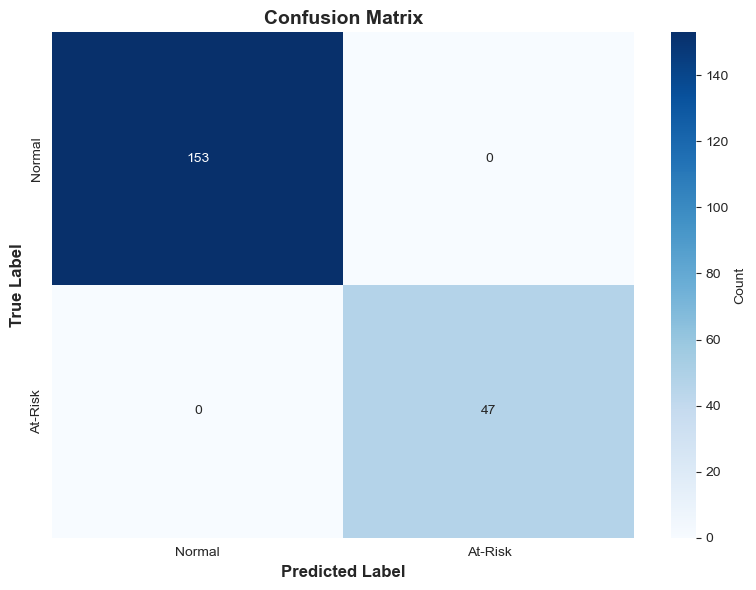

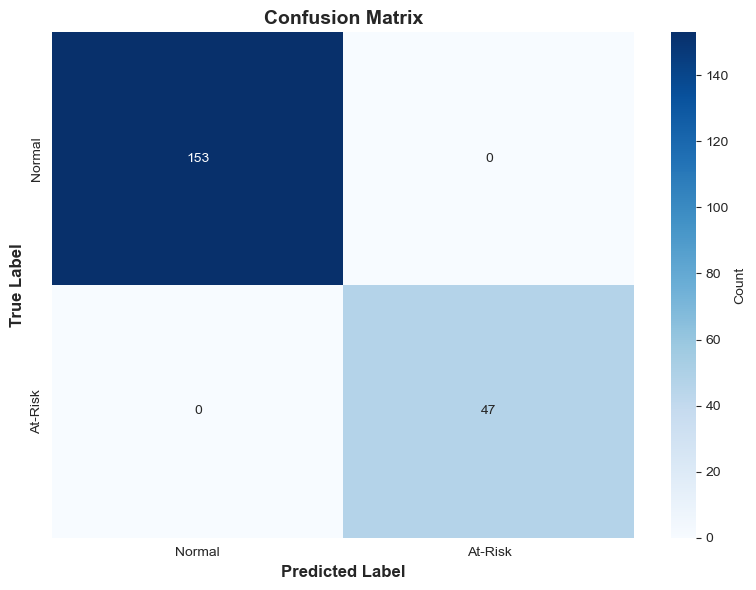

In [8]:
# Confusion matrix for best model
print("\nConfusion Matrix:")
analyzer.plot_confusion_matrix(best_result['y_test'], best_result['y_pred'])

## Step 5: Feature Importance

Top 10 Most Important Features:
                 feature  importance
13     pages_per_session    0.587997
5         avg_quiz_score    0.583062
2       total_page_views    0.565685
14       posts_per_login    0.559568
16       assignment_rate    0.554053
3      total_forum_posts    0.547503
4      total_assignments    0.537342
1   avg_session_duration    0.532368
11   session_consistency    0.495619
8            days_active    0.484262




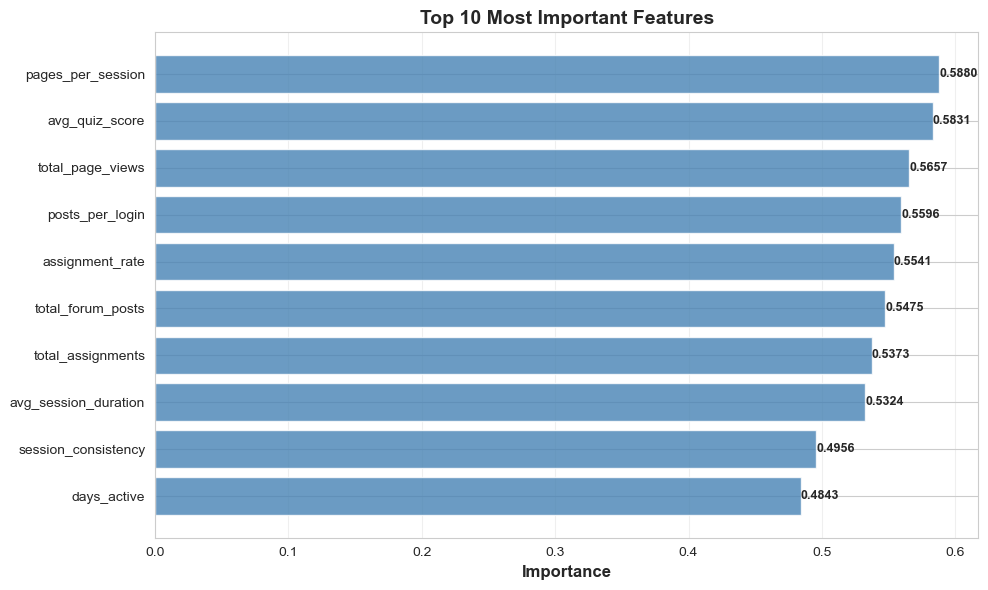

In [9]:
# Get and visualize feature importance
importance_df = predictor.get_feature_importance()

if importance_df is not None:
    print("Top 10 Most Important Features:")
    print(importance_df.head(10))
    print("\n")
    analyzer.plot_feature_importance(importance_df, top_n=10)

## Step 6: Save the Trained Model

In [10]:
# Save the best model
model_path = predictor.save_model(model_name='best_model')

print(f"\n" + "="*60)
print("MODEL TRAINING PIPELINE COMPLETE")
print("="*60)
print(f"✓ Best model: {predictor.best_model_name}")
print(f"✓ Test AUC: {results[predictor.best_model_name]['test_auc']:.4f}")
print(f"✓ Model saved to: {model_path}")
print(f"\nNext step: Run notebook 04_model_evaluation.ipynb")
print("="*60)

Model saved to: C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms\models\best_model.pkl
Scaler saved to: C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms\models\best_model_scaler.pkl
Features saved to: C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms\models\best_model_features.pkl

MODEL TRAINING PIPELINE COMPLETE
✓ Best model: logistic
✓ Test AUC: 1.0000
✓ Model saved to: C:\Users\aimje\OneDrive\Documents\Other projects\early_detection_lms\models\best_model.pkl

Next step: Run notebook 04_model_evaluation.ipynb
